In [ ]:
from pso import PSOOptimizer, GBestStrategy, LBestStrategy, StarStrategy, RandomNeighborStrategy
from Functions import AckleyFunction
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from plotting import plot_metrics

num_run = 0	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 2.076863026747781
num_run = 1	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 0.6798705555830975
num_run = 2	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 2.037246920374337
num_run = 3	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 2.1990406500294744
num_run = 4	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 2.9219754911349303
num_run = 5	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 0.0947264405442465
num_run = 6	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 0.4647619817850246
num_run = 7	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 0.22516884353359545
num_run = 8	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 2.0623438750809666
num_run = 9	w = 0.2	c1 = 2.5	c2 = 2.5	particles = 30	best_value = 2.2058514296463483


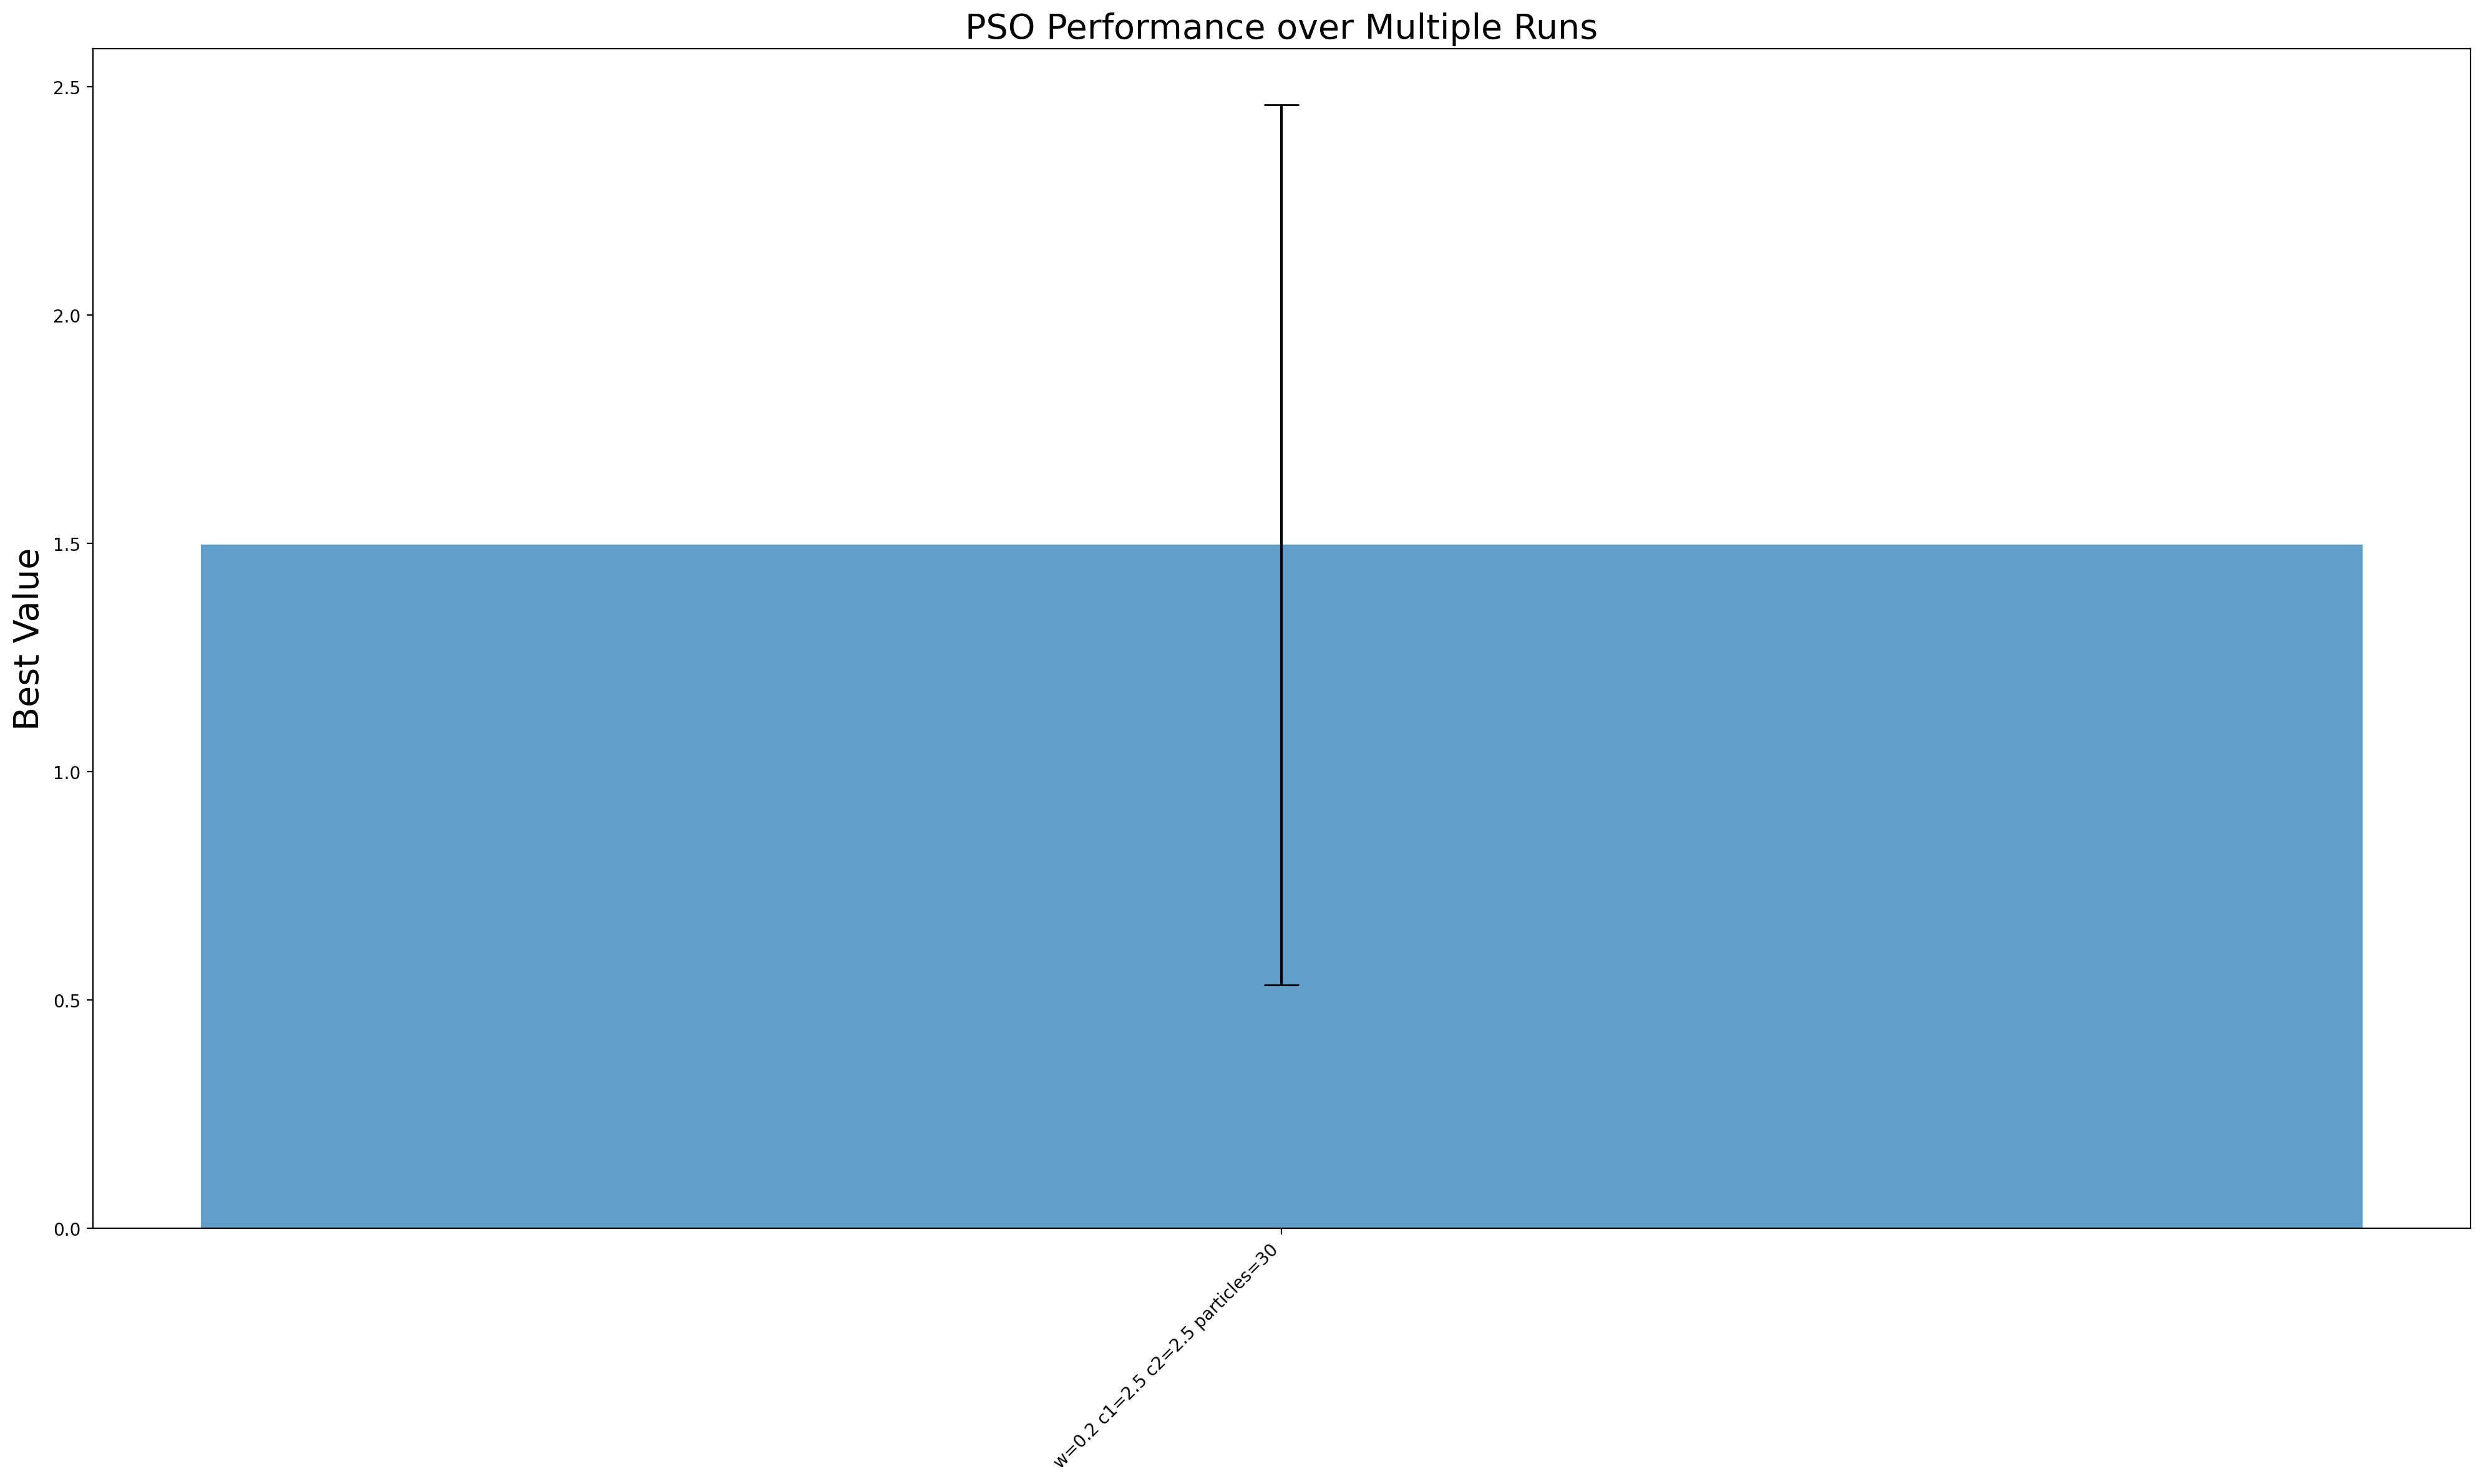

In [24]:
from pso import PSOOptimizer, GBestStrategy, LBestStrategy, StarStrategy, RandomNeighborStrategy
from Functions import AckleyFunction
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from plotting import plot_metrics

'''
Hyperparameters settings:
'''
num_runs = 10
ackley_function = AckleyFunction(10)
w_values = 0.2
c1_values = 2.5
c2_values = 2.5
num_particles_values = 30
results = []

'''
save the hyperparameters to a file, so that we can keep track of them
'''

with open("run_number.txt", 'r') as f:
    run_number = int(f.read())

if not os.path.exists(f"hyperparameter_settings/GridSearch_{run_number}th_run_hyperparameters.txt"):
    # Creating a file to store hyperparameters
    with open(f"hyperparameter_settings/GridSearch_{run_number}th_run_hyperparameters.txt", 'w') as f:
        f.write(f"hyperparameters for {run_number}th run\n")
else:
    print(f"hyperparameter_settings/GridSearch_{run_number}th_run_hyperparameters.txt already exists. THIS SHOULDNT HAPPEN.")
    print(f"Please delete this file: hyperparameter_settings/GridSearch_{run_number}th_run_hyperparameters.txt and run the program again.")
    print("Exiting...")


with open(f"hyperparameter_settings/GridSearch_{run_number}th_run_hyperparameters.txt", 'w') as f:
    f.write(f"w_values = {w_values}\n")
    f.write(f"c1_values = {c1_values}\n")
    f.write(f"c2_values = {c2_values}\n")
    f.write(f"num_particles_values = {num_particles_values}\n")
    f.write(f"num_runs = {num_runs}\n")
    f.write("\n")

'''
Running PSO for each hyperparameter possible combination
'''

run_results = []

best_fitness_values = []
com_distances = []
position_stddevs = []
mean_velocities = []

metrics_array = []

for run in range(num_runs):
    pso_optimizer = PSOOptimizer(ackley_function.evaluate, dimensions=10, w=w_values, c1=c1_values, c2=c2_values, num_particles=num_particles_values, strategy=RandomNeighborStrategy())
    
    _, best_value, best_fitness_values, com_distances, position_stddevs, mean_velocities = pso_optimizer.optimize(best_fitness_values, com_distances, position_stddevs, mean_velocities)
    metrics = (best_fitness_values, com_distances, position_stddevs, mean_velocities)
    metrics_array.append(metrics)

    run_results.append(best_value)
    print("num_run = {}\tw = {}\tc1 = {}\tc2 = {}\tparticles = {}\tbest_value = {}".format(run, w_values, c1_values, c2_values, num_particles_values, best_value))

results.append({
    'w': w_values,
    'c1': c1_values,
    'c2': c2_values,
    'num_particles': num_particles_values,
    'results': run_results,
    'mean': np.mean(run_results),
    'std': np.std(run_results)
})

'''
Saving results to a file
'''
 
# Extracting means and standard deviations for plotting
means = [res['mean'] for res in results]
stds = [res['std'] for res in results]
labels = [f"w={res['w']} c1={res['c1']} c2={res['c2']} particles={res['num_particles']}" for res in results]

#extract the best hyperparameters and the best value
best_result = results[np.argmin(means)]
best_hyperparameters = f"w={best_result['w']} c1={best_result['c1']} c2={best_result['c2']} particles={best_result['num_particles']}"
best_value = np.min(means)

# Saving results to a file, in a nice format
with open(f'results/results_run_{run_number}.txt', 'w') as f:
    f.write("############# BEST RESULT ###############\n")
    f.write(f"best hyperparameters: {best_hyperparameters}\n")
    f.write(f"best value: {best_value}\n")
    f.write("############# ALL VALUES ###############\n")
    for res in results:
        f.write(f"w={res['w']} c1={res['c1']} c2={res['c2']} particles={res['num_particles']}\n")
        f.write(f"mean={res['mean']}\n")
        f.write("\n")

'''
plotting the results and save the plot as a png file
'''

# Plotting
plt.figure(figsize=(20,12), dpi=200)  # Adjust width as needed

# Plot the bars
bars = plt.bar(range(len(means)), means, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10)

# Adjusting x-tick labels using bar positions
positions = [bar.get_x() + bar.get_width() / 2 for bar in bars]
xticks, xticklabels = plt.xticks(positions, labels, rotation=45)

# Adjust the horizontal alignment for each xtick label
for xticklabel in xticklabels:
    xticklabel.set_horizontalalignment('right')

plt.ylabel('Best Value', fontsize=20)
plt.title('PSO Performance over Multiple Runs', fontsize=20)
plt.tight_layout()

# Save the plot as a png file
plt.savefig(f'graphs/PSO_run_{run_number}.png')

# Updating the run number
with open("run_number.txt", 'w') as f:
    f.write(str(run_number + 1))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(metrics, title="PSO Optimization Progress"):
    """
    Plots the optimization progress across 4 different metrics.

    Parameters:
        metrics (tuple of lists): Contains the optimization metrics across iterations. 
                                  Each element of the tuple should be a list of lists, where each inner list 
                                  represents a run and contains the metric values across iterations.
        title (str): The title of the plot.
    """

    best_fitness, distance_to_optimum, swarm_std_dev, mean_velocity_length = metrics
    print(f"best_fitness: {best_fitness}")
    print(f"len(best_fitness): {len(best_fitness)}")

    print(f"distance_to_optimum: {distance_to_optimum}")
    print(f"len(distance_to_optimum): {len(distance_to_optimum)}")

    print(f"swarm_std_dev: {swarm_std_dev}")
    print(f"len(swarm_std_dev): {len(swarm_std_dev)}")

    print(f"mean_velocity_length: {mean_velocity_length}")
    print(f"len(mean_velocity_length): {len(mean_velocity_length)}")

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig.suptitle(title)

    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].set_ylabel('Best Fitness')

    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].set_ylabel('Distance to Global Optimum')

    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].set_ylabel('Swarm Standard Deviation')

    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].set_ylabel('Mean Velocity Length')

    num_runs = 10

    for iter in range(num_runs):
        print(f"Run {iter+1}:")
        print(f"Best fitness: {best_fitness[iter]}")
        # Subplot 1: Best Fitness Value
        axs[0, 0].semilogy(best_fitness[iter], label=f"Run {iter+1}")
        axs[0, 0].title.set_text("Best Fitness")
        axs[0, 0].legend()

        # Subplot 2: Distance to Global Optimum
        axs[0, 1].semilogy(distance_to_optimum[iter], label=f"Run {iter+1}")
        axs[0, 1].title.set_text("Distance to Global Optimum")
        axs[0, 1].legend()

        # Subplot 3: Standard Deviation of Particle Positions
        axs[1, 0].semilogy(swarm_std_dev[iter], label=f"Run {iter+1}")
        axs[1, 0].title.set_text("Swarm Standard Deviation")
        axs[1, 0].legend()

        # Subplot 4: Mean Length of Velocity Vectors
        axs[1, 1].semilogy(mean_velocity_length[iter], label=f"Run {iter+1}")
        axs[1, 1].title.set_text("Mean Velocity Length")
        axs[1, 1].legend()

    plt.show()

In [ ]:
print(np.array(metrics_array))
print(np.array(metrics_array).shape)

In [25]:
def plot_metrics(metrics_array, title="PSO Optimization Progress"):
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig.suptitle(title)

    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].set_ylabel('Best Fitness')
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].set_ylabel('Distance to Global Optimum')
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].set_ylabel('Swarm Standard Deviation')
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].set_ylabel('Mean Velocity Length')

    num_iterations = len(metrics_array[0][0])

    print(num_runs)

    # Loop through each run
    for run_idx in range(num_runs):

        best_fitness, distance_to_optimum, swarm_std_dev, mean_velocity_length = metrics_array[run_idx]

        print(len(best_fitness))

        
        # Extract data for this run
        run_best_fitness = [best_fitness[it] for it in range(num_iterations)]
        run_distance_to_optimum = [distance_to_optimum[it] for it in range(num_iterations)]
        run_swarm_std_dev = [swarm_std_dev[it] for it in range(num_iterations)]
        run_mean_velocity_length = [mean_velocity_length[it] for it in range(num_iterations)]

        # Plot data
        axs[0, 0].semilogy(run_best_fitness, label=f"Run {run_idx+1}")
        axs[0, 1].semilogy(run_distance_to_optimum, label=f"Run {run_idx+1}")
        axs[1, 0].semilogy(run_swarm_std_dev, label=f"Run {run_idx+1}")
        axs[1, 1].semilogy(run_mean_velocity_length, label=f"Run {run_idx+1}")

    # Add legends
    for ax in axs.flat:
        ax.legend()

    plt.show()

10
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000


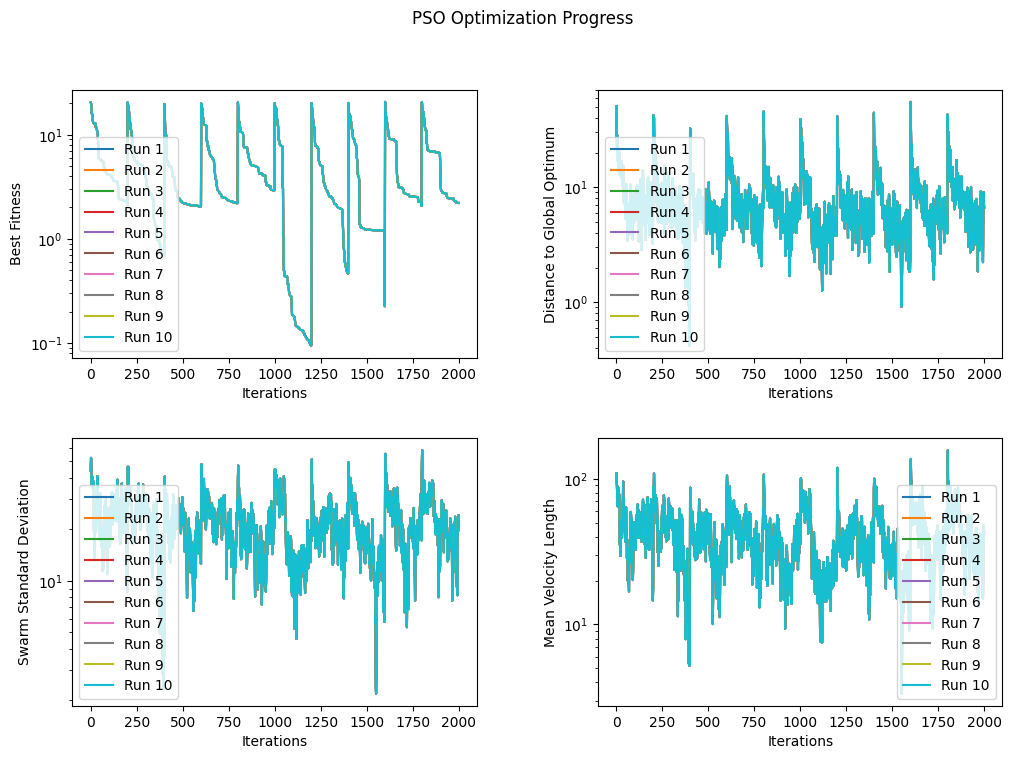

In [26]:
plot_metrics(metrics_array, title="PSO Optimization Progress")